# Equivalent layer technique for estimating total magnetization direction using regular grid

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'regular_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_sphere.pickle') as f:
        model_sphere = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/regular_grid.pickle') as f:
        reg_grid = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_reg = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (reg_grid['area'][1], 
                                                                                                reg_grid['area'][0],
                                                                                                reg_grid['area'][3],
                                                                                                reg_grid['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### reg_grid survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% reg_grid['shape'] 
print 'Number of data: %.1f' % reg_grid['N']
print 'dx: %.1f m' % reg_grid['dx']
print 'dy: %.1f m ' % reg_grid['dy']

Shape : (25,25)
Number of data: 625.0
dx: 500.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_sphere['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 40.0 degree
Main field declination: 45.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_sphere['m_R']
print 'Inclination: %.1f degree' % model_sphere['inc_R']
print 'Declination: %.1f degree' % model_sphere['dec_R']

Intensity: 3.0 A/m
Inclination: 30.0 degree
Declination: 20.0 degree


In [16]:
inc_R,dec_R = model_sphere['inc_R'],model_sphere['dec_R']

## Generating the layer with my function 

In [17]:
h = 1500.

#### Generating a layer

In [18]:
shape_layer = (reg_grid['shape'][0],reg_grid['shape'][1])

In [19]:
xs,ys,zs = regular(reg_grid['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e4,1e5,1e6,5.*1e6,1e7]

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_sphere_RM_reg'],reg_grid['x'],reg_grid['y'],
        reg_grid['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(reg_grid['x'],reg_grid['y'],reg_grid['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_sphere_RM_reg'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
0.705617663948 -3.8422189313
i = 1
6.14837320447 -1.87266144182
i = 2
9.01955913063 -0.598819006422
i = 3
10.9472929054 0.459532277463
i = 4
12.41859572 1.40397048025
i = 5
13.6422273317 2.22573603277
i = 6
14.6971149248 3.01334428627
i = 7
15.6158892804 3.75916081745
i = 8
16.4233454542 4.48547513173
i = 9
17.1383978328 5.19143599049
i = 10
17.7748667948 5.85932400155
i = 11
18.3458993311 6.49052256421
i = 12
18.8620194682 7.08848418715
i = 13
19.3319067919 7.65363781198
i = 14
19.7604181575 8.18251217429
i = 15
20.1521843078 8.67150283059
i = 16
20.5132857405 9.1388992077
i = 17
20.8466313073 9.58385921063
i = 18
21.1547575402 10.0059253993
i = 19
21.4401869532 10.3998858744
i = 20
21.7054995554 10.7637253801
i = 21
21.9528508487 11.1065908105
i = 22
22.1836372888 11.4288040812
i = 23
22.3992741059 11.7284886216
i = 24
22.6014018964 12.0064565358
i = 25
22.7914611915 12.2634218118
i = 26
22.9709139178 12.5004957158
i = 27
23.1412106469 12.7214779042
i = 28
23.3036122521 12.9324

26.8799281738 16.8204546986
i = 69
26.9373836138 16.8692243957
i = 70
26.9940993291 16.9172946142
i = 71
27.050091052 16.9646645564
i = 72
27.1053737598 17.0113450473
i = 73
27.1599619924 17.057346763
i = 74
27.2138698675 17.102680233
i = 75
27.2671581456 17.1473232092
i = 76
27.3198389819 17.1912855755
i = 77
27.3719231669 17.2345855271
i = 78
27.423420984 17.2772301383
i = 79
27.4743397377 17.3192999112
i = 80
27.5246863344 17.3609112413
i = 81
27.5744737784 17.4020681393
i = 82
27.6237139864 17.4427718929
i = 83
27.6724156406 17.4830262963
i = 84
27.7205873116 17.5228383987
i = 85
27.7682373902 17.5622149856
i = 86
27.8153799427 17.6011861987
i = 87
27.8620256575 17.6397636537
i = 88
27.9081902871 17.6779793522
i = 89
27.9538806475 17.7158358984
i = 90
27.9991034325 17.753335875
i = 91
28.0438662499 17.7904811062
i = 92
28.0881760453 17.8272737485
i = 93
28.132009092 17.8635888947
i = 94
28.1753508133 17.8994052192
i = 95
28.2182058097 17.9347278576
i = 96
28.2605820577 17.969562806

30.9230341586 19.1127063434
i = 136
30.95718124 19.134424596
i = 137
30.9909700593 19.1559693595
i = 138
31.0244072576 19.1773449921
i = 139
31.0574967672 19.1985523142
i = 140
31.0901562514 19.2195227628
i = 141
31.1223757426 19.2402305927
i = 142
31.1541617014 19.2606744863
i = 143
31.1855207585 19.280857268
i = 144
31.2164594238 19.3007817436
i = 145
31.2469840893 19.3204507008
i = 146
31.2771010315 19.3398669085
i = 147
31.3068173266 19.3590325121
i = 148
31.3361415196 19.3779565724
i = 149
31.3650811265 19.3966485292
i = 150
31.3936418024 19.4151107283
i = 151
31.4218293566 19.4333449708
i = 152
31.4496392956 19.4513722522
i = 153
31.4770434743 19.4692325567
i = 154
31.5040376301 19.4869268617
i = 155
31.5306265317 19.5044577627
i = 156
31.5568146357 19.5218280575
i = 157
31.5826161936 19.5390469448
i = 158
31.6080405586 19.5561180565
i = 159
31.6330386769 19.573055512
i = 160
31.6576107896 19.5898600247
i = 161
31.681775586 19.6065259274
i = 162
31.705542001 19.6230516177
i = 163

### L-curve visualization

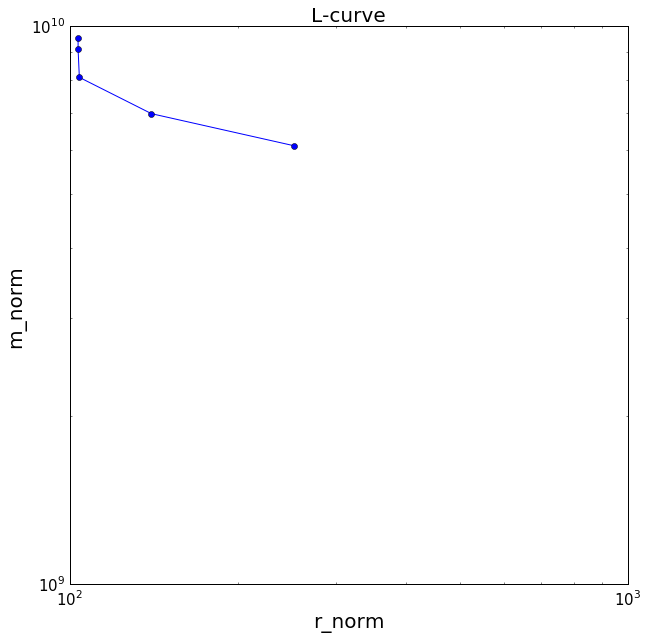

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/regular/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_reg['magnetic_moment'] = m_est
result_RM_reg['inc_est'] = incl_est
result_RM_reg['dec_est'] = decl_est
result_RM_reg['layer_depth'] = h
result_RM_reg['reg_parameter'] = mu_list
result_RM_reg['phi'] = phi_list

#### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_reg['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_reg.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_reg, f)
    
saved_files.append(file_name)


### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/regular/Lcurve_RM.png
2  figs/regular/Lcurve_RM.eps
3  data/result_RM_reg.pickle
